# import the libraries



In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
student = pd.read_csv('student_grade_pridiction_csv')
student.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,no,3,4,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,no,yes,3,3,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,yes,3,2,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,2,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,3,2,5,4,6,10,10


In [3]:
student.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        395 non-null    object
 1   sex           395 non-null    object
 2   age           395 non-null    int64 
 3   address       395 non-null    object
 4   famsize       395 non-null    object
 5   Pstatus       395 non-null    object
 6   Medu          395 non-null    int64 
 7   Fedu          395 non-null    int64 
 8   Mjob          393 non-null    object
 9   Fjob          395 non-null    object
 10  guardian      395 non-null    object
 11  traveltime    395 non-null    int64 
 12  studytime     395 non-null    int64 
 13  failures      395 non-null    int64 
 14  Ssupport      395 non-null    object
 15  Gsupport      395 non-null    object
 16  feespaid      395 non-null    object
 17  ecactivities  395 non-null    object
 18  internet      395 non-null    object
 19  freetime

In [4]:
student['G1'].describe()


count    395.000000
mean      10.908861
std        3.319195
min        3.000000
25%        8.000000
50%       11.000000
75%       13.000000
max       19.000000
Name: G1, dtype: float64

Text(0, 0.5, 'Final Grade')

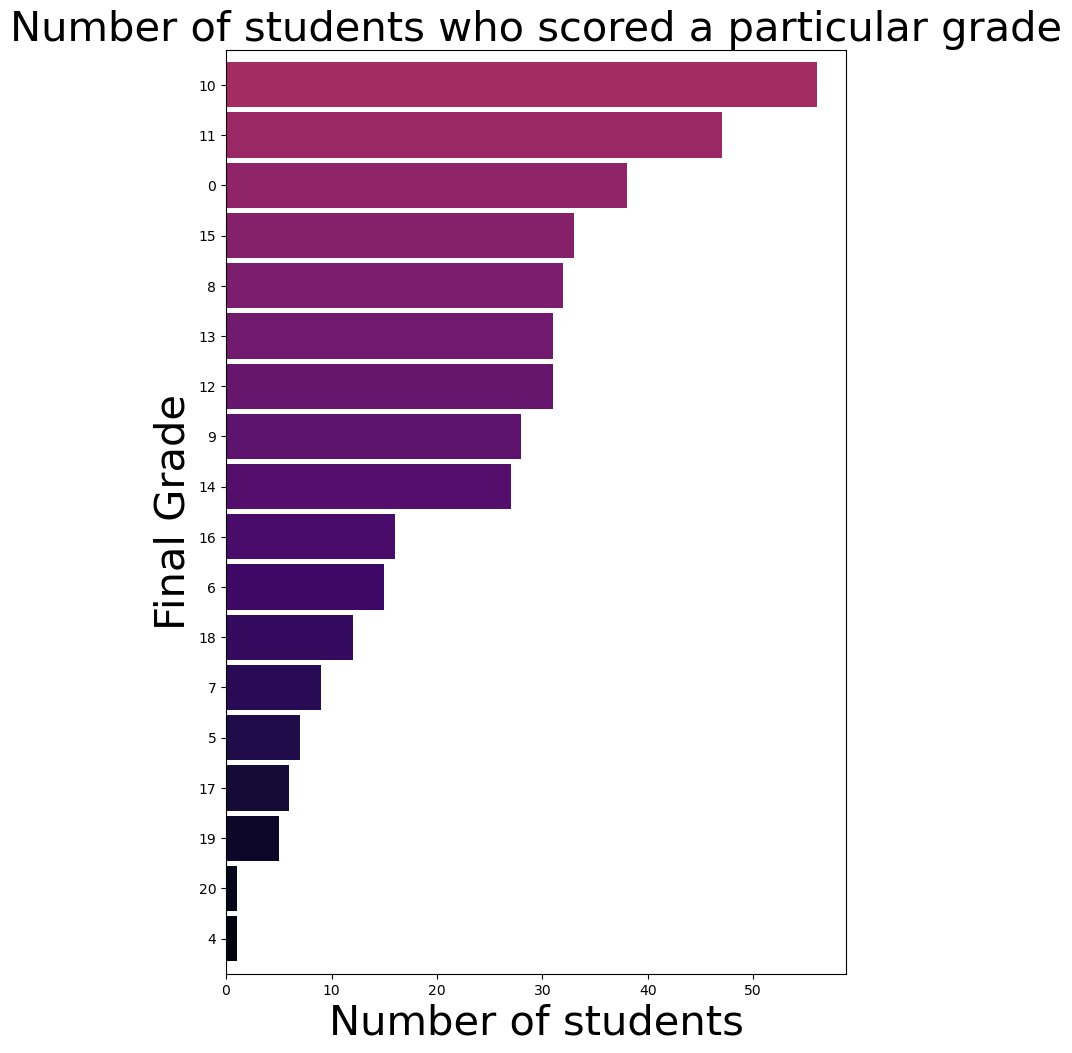

In [5]:
plt.subplots(figsize=(8,12))
grade_counts = student['G3'].value_counts().sort_values().plot.barh(width=.9,color=sns.color_palette('inferno',40))
grade_counts.axes.set_title('Number of students who scored a particular grade',fontsize=30)
grade_counts.set_xlabel('Number of students', fontsize=30)
grade_counts.set_ylabel('Final Grade', fontsize=30)


C:\Users\admin\AppData\Local\Temp\ipykernel_8204\411389294.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = student.corr()


<Axes: >

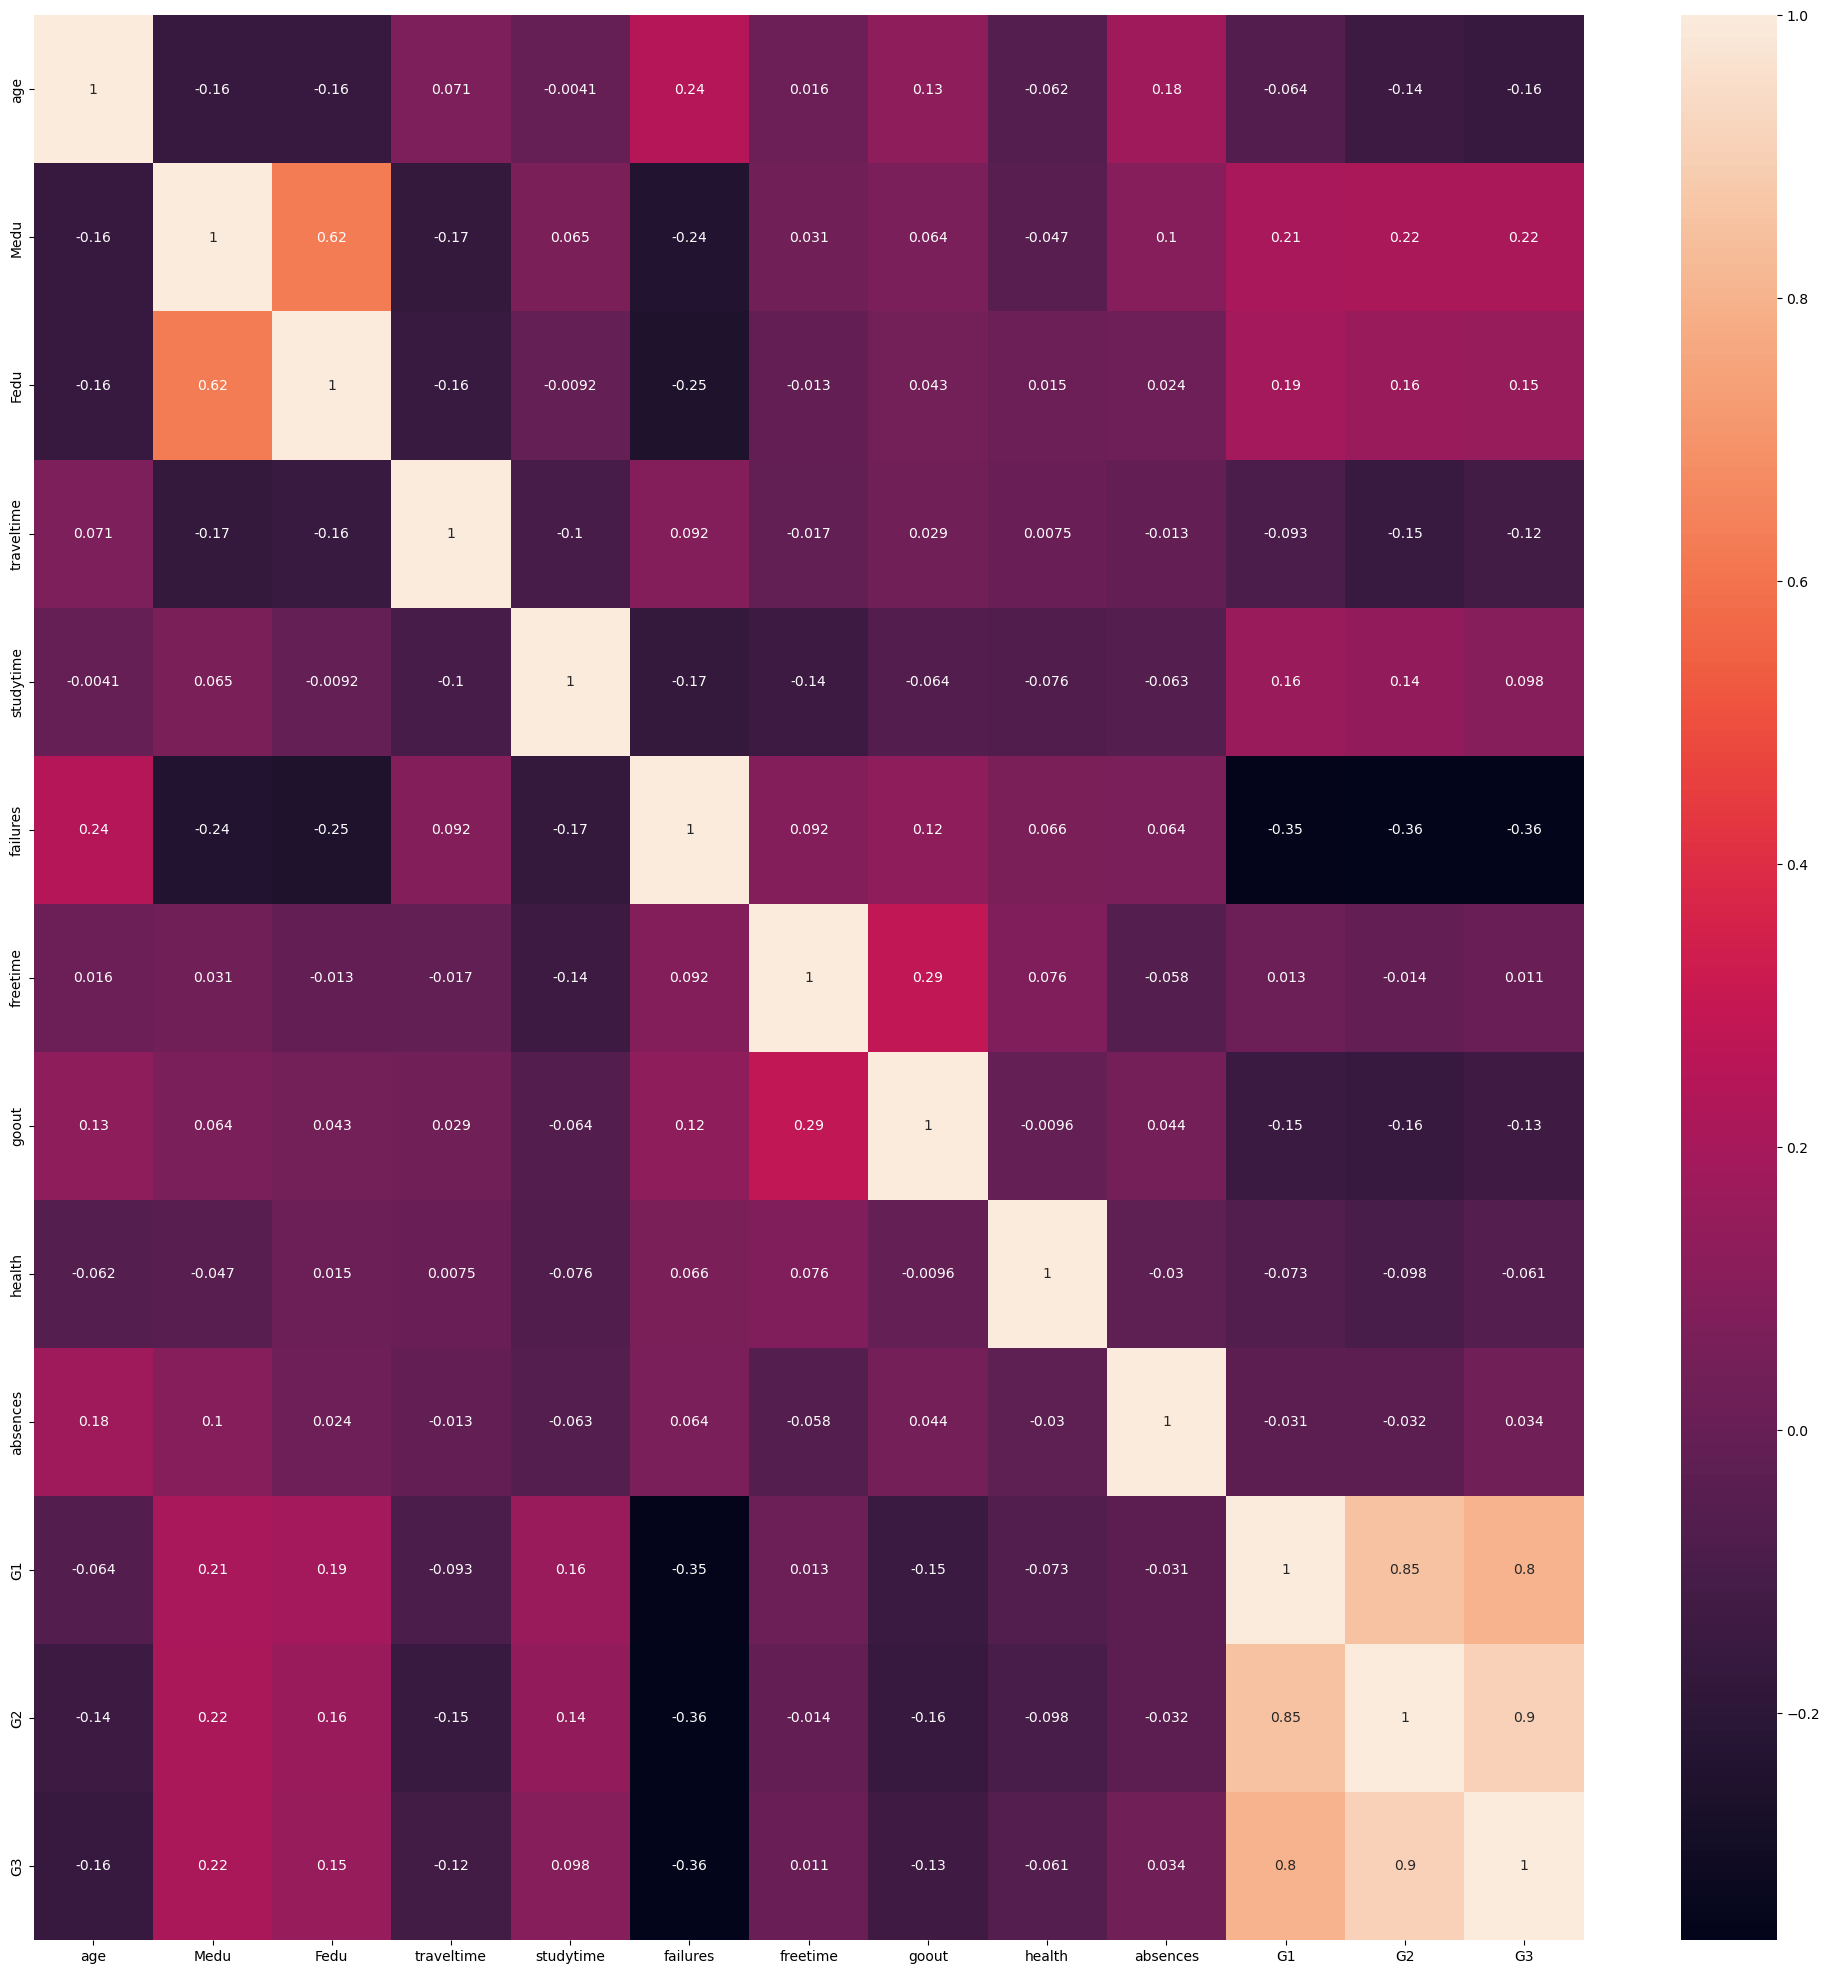

In [6]:
corr = student.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True)


In [7]:
matrix_corr = student.corr()
matrix_corr.G3.sort_values()


C:\Users\admin\AppData\Local\Temp\ipykernel_8204\4250511830.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = student.corr()


failures     -0.360415
age          -0.161579
goout        -0.132791
traveltime   -0.117142
health       -0.061335
freetime      0.011307
absences      0.034247
studytime     0.097820
Fedu          0.152457
Medu          0.217147
G1            0.801468
G2            0.904868
G3            1.000000
Name: G3, dtype: float64

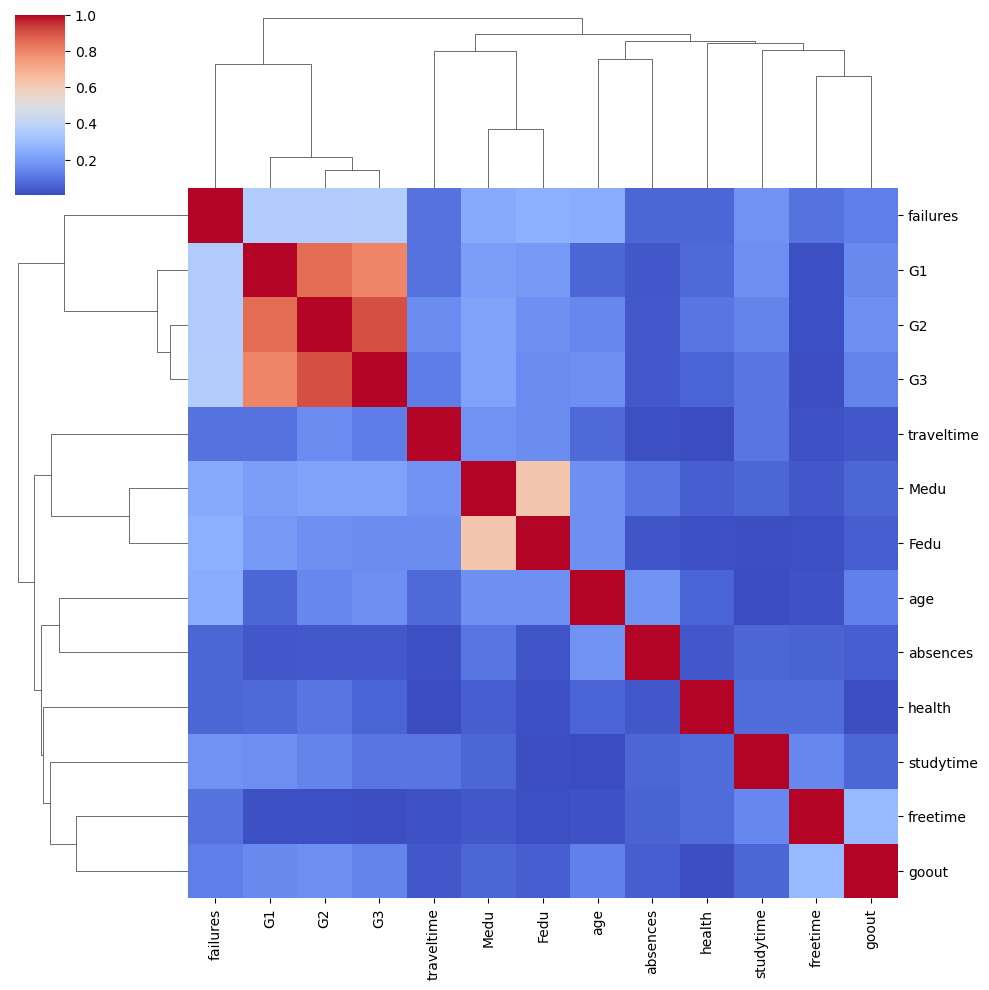

In [8]:
sns.clustermap(abs(corr), cmap="coolwarm")


In [9]:
num_features = [name for name in student.columns if student[name].dtype in ['int64', 'float64']]
cat_features = [name for name in student.columns if student[name].dtype == 'object']


In [10]:
cat_features

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'guardian',
 'Ssupport',
 'Gsupport',
 'feespaid',
 'ecactivities',
 'internet']

In [11]:
num_features

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'freetime',
 'goout',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [12]:
for x in cat_features:
  print(x," = ",student[x].unique())


school  =  ['GP' 'MS']
sex  =  ['F' 'M']
address  =  ['U' 'R']
famsize  =  ['GT3' 'LE3']
Pstatus  =  ['A' 'T']
Mjob  =  ['at_home' 'health' 'other' 'services' nan 'teacher']
Fjob  =  ['teacher' 'other' 'services' 'health' 'at_home']
guardian  =  ['mother' 'father' 'other']
Ssupport  =  ['yes' 'no']
Gsupport  =  ['no' 'yes']
feespaid  =  ['no' 'yes']
ecactivities  =  ['no' 'yes']
internet  =  ['no' 'yes']


In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(cat_features):
    student[i]=le.fit_transform(student[i])


In [14]:
for x in cat_features:
  print(x," = ",student[x].unique())


school  =  [0 1]
sex  =  [0 1]
address  =  [1 0]
famsize  =  [0 1]
Pstatus  =  [0 1]
Mjob  =  [0 1 2 3 5 4]
Fjob  =  [4 2 3 1 0]
guardian  =  [1 0 2]
Ssupport  =  [1 0]
Gsupport  =  [0 1]
feespaid  =  [0 1]
ecactivities  =  [0 1]
internet  =  [0 1]


In [15]:
student.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,feespaid,ecactivities,internet,freetime,goout,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,0,0,0,3,4,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,0,0,1,3,3,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,0,1,3,2,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,2,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,3,2,5,4,6,10,10


In [16]:
student.loc[student.G3 <= 9, 'G3'] = 0
student.loc[student.G3 > 9, 'G3'] = 1


In [17]:
student.loc[student.G2 <= 9, 'G2'] = 0
student.loc[student.G2 > 9, 'G2'] = 1


In [18]:
student.loc[student.G1 <= 9, 'G1'] = 0
student.loc[student.G1 > 9, 'G1'] = 1


In [19]:
X1 = student.drop('G1',axis=1)
X2 = X1.drop('G2',axis=1)
X = X2.drop('G3',axis=1)
y = student['G1']


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# Régression logistique



In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_test)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
print(confusion_matrix(y_test,y_lr))
print(accuracy_score(y_test,y_lr))


[[12 16]
 [ 9 42]]
0.6835443037974683


# Random forests



In [23]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
cm = confusion_matrix(y_test, y_rf)


In [24]:
print(cm)
print(accuracy_score(y_test,y_rf))


[[11 17]
 [ 9 42]]
0.6708860759493671
